In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [5]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


Text(0, 0.5, 'Price [dollars/$m^2$]')

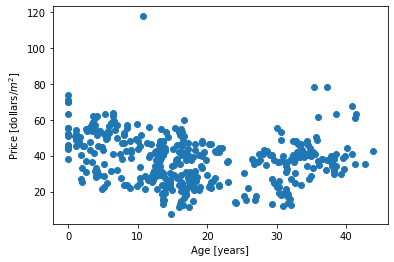

In [6]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')

In [9]:
%%capture
pip install ipywidgets

In [32]:
def ECM (theta,x,y):
    m = len(x)
    theta0, theta1 = theta
    h0 = theta0 + theta1 * x
    
    jtheta = (1/m)* np.sum((h0)-y)
    
    theta0 = (1/m)* np.sum((h0)-y) 
    theta1 = (1/m)* np.sum(((h0)-y)* x)
    theta = (theta0,theta1)
    return jtheta,theta
    

In [33]:
def cal_theta(theta):
    theta0, theta1 = theta
    

In [42]:
x = data['X2 house age']
y = data['Y house price of unit area']

errores = []
iteraciones =[]
N0 = 10

# definamos los valores iniciales de theta
theta = (0,1)
for i in range(N0):

    # primero vamos a normalizar las entradas
    x = (x - np.min(x))/((np.max(x)-np.min (x)))

    error,theta = ECM(theta,x,y)
    errores.append(error)
    iteraciones.append(i+1)


Text(0, 0.5, 'errores')

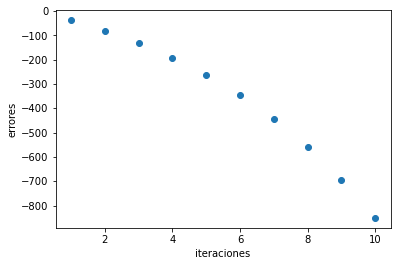

In [43]:
# Graficando las variables de interes
plt.scatter(iteraciones,errores)
plt.xlabel('iteraciones')
plt.ylabel('errores')
#plt.plot(x,h,'r')

In [38]:

N0 = np.array(1000)
N0[:]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed